# Breast Cancer Prediction

#### This notebook is part of learning the first steps on Kaggle guided project on Coursera, "Breast Cancer Prediction Using Machine Learning" by Priya Jha ([Link](https://www.coursera.org/projects/breast-cancer-prediction-using-machine-learning)). In the course, the instructor uses logistic regression but in this notebook I will use another classification model, decision trees and ensemble learning tecniques such as bagging and boosting. 

#### [Here](https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data?datasetId=180) you can find the breast cancer prediction on Kaggle.


#### All the code was written in Python 3, using Google Colab.


# Importing main libraries

In [102]:
# Import libraries

import itertools
import os 

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor


# Downloading the dataset from Kaggle

#### I will download the dataset using Kaggle's API and store the csv file in a Google Drive folder.

In [103]:
# Set kaggle API credentials
os.environ["KAGGLE_USERNAME"] = ""
os.environ["KAGGLE_KEY"] = ""

In [104]:
# Download dataset

! kaggle datasets download -d uciml/breast-cancer-wisconsin-data

breast-cancer-wisconsin-data.zip: Skipping, found more recently modified local copy (use --force to force download)


In [105]:
# Unzip file
! unzip /content/breast-cancer-wisconsin-data.zip


Archive:  /content/breast-cancer-wisconsin-data.zip
replace data.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: data.csv                


# Loading and exploring the data

In [106]:
# Load data on dataframe

df = pd.read_csv("/content/data.csv")

In [107]:
# Display dataframe

df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [108]:
# Count of rows and columns

df.shape

(569, 33)

In [109]:
# Count number of null (empty) values

df.isna().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

Here we can see that there are 569 null values, all of them in "Unnamed: 32" column. Let's drop this column. 

In [110]:
# Drop the column with null values

df.dropna(axis = 1, inplace = True)

In [111]:
# Count of rows and columns

df.shape

(569, 32)

In [112]:
# Get count of number of M or B cells in diagnosis

df["diagnosis"].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

The dataset have more benign tumors than malignat ones. So our data is a little bit imbalanced. This will impact our way to evaluate the model's score.

# Label Encoding

Since our target data is not numerical, we need to encode all values in this column to fit them in our model due the logistic regression model only accepts numerical features.

In [113]:
# Get Datatypes of each column in our dataset

df.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [114]:
#Encode the diagnosis values

labelencoder = LabelEncoder()
df.iloc[:,1] = labelencoder.fit_transform(df.iloc[:,1].values)

In [115]:
# Display df

df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Before we start to think about modeling our data, we need to choose which features will take part in our algorithm. We are aware that our dataset have 32 columns, which is a lot. In order to evalute the possibility of choosing or not some of these columns, we are going to look if there are linear correlations among them. And if there is, we can drop one of the two columns that have strong linear correlation.

In [116]:
# Displaying the correlation

df.corr().style.background_gradient(cmap='seismic').set_precision(2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  This is separate from the ipykernel package so we can avoid doing imports until


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,1.00,0.04,0.07,0.10,0.07,0.10,-0.01,0.00,0.05,0.04,-0.02,-0.05,0.14,-0.01,0.14,0.18,0.10,0.03,0.06,0.08,-0.02,0.03,0.08,0.06,0.08,0.11,0.01,-0.00,0.02,0.04,-0.04,-0.03
diagnosis,0.04,1.00,0.73,0.42,0.74,0.71,0.36,0.60,0.70,0.78,0.33,-0.01,0.57,-0.01,0.56,0.55,-0.07,0.29,0.25,0.41,-0.01,0.08,0.78,0.46,0.78,0.73,0.42,0.59,0.66,0.79,0.42,0.32
radius_mean,0.07,0.73,1.00,0.32,1.00,0.99,0.17,0.51,0.68,0.82,0.15,-0.31,0.68,-0.10,0.67,0.74,-0.22,0.21,0.19,0.38,-0.10,-0.04,0.97,0.30,0.97,0.94,0.12,0.41,0.53,0.74,0.16,0.01
texture_mean,0.10,0.42,0.32,1.00,0.33,0.32,-0.02,0.24,0.30,0.29,0.07,-0.08,0.28,0.39,0.28,0.26,0.01,0.19,0.14,0.16,0.01,0.05,0.35,0.91,0.36,0.34,0.08,0.28,0.30,0.30,0.11,0.12
perimeter_mean,0.07,0.74,1.00,0.33,1.00,0.99,0.21,0.56,0.72,0.85,0.18,-0.26,0.69,-0.09,0.69,0.74,-0.20,0.25,0.23,0.41,-0.08,-0.01,0.97,0.30,0.97,0.94,0.15,0.46,0.56,0.77,0.19,0.05
area_mean,0.10,0.71,0.99,0.32,0.99,1.00,0.18,0.50,0.69,0.82,0.15,-0.28,0.73,-0.07,0.73,0.80,-0.17,0.21,0.21,0.37,-0.07,-0.02,0.96,0.29,0.96,0.96,0.12,0.39,0.51,0.72,0.14,0.00
smoothness_mean,-0.01,0.36,0.17,-0.02,0.21,0.18,1.00,0.66,0.52,0.55,0.56,0.58,0.30,0.07,0.30,0.25,0.33,0.32,0.25,0.38,0.20,0.28,0.21,0.04,0.24,0.21,0.81,0.47,0.43,0.50,0.39,0.50
compactness_mean,0.00,0.60,0.51,0.24,0.56,0.50,0.66,1.00,0.88,0.83,0.60,0.57,0.50,0.05,0.55,0.46,0.14,0.74,0.57,0.64,0.23,0.51,0.54,0.25,0.59,0.51,0.57,0.87,0.82,0.82,0.51,0.69
concavity_mean,0.05,0.70,0.68,0.30,0.72,0.69,0.52,0.88,1.00,0.92,0.50,0.34,0.63,0.08,0.66,0.62,0.10,0.67,0.69,0.68,0.18,0.45,0.69,0.30,0.73,0.68,0.45,0.75,0.88,0.86,0.41,0.51
concave points_mean,0.04,0.78,0.82,0.29,0.85,0.82,0.55,0.83,0.92,1.00,0.46,0.17,0.70,0.02,0.71,0.69,0.03,0.49,0.44,0.62,0.10,0.26,0.83,0.29,0.86,0.81,0.45,0.67,0.75,0.91,0.38,0.37


We cannot see clearly any strong linear correlations among all the dataset's columns, so we do not need to drop any feature now.

# Split Dataset & Feature Scaling

In order to train and test our model, we need to split the dataset in 25% for test and 75% for training.

In [117]:
# Splitting the dataset into independent and dependent datasets 

X = df.iloc[:,2:].values
y = df.iloc[:,1].values

In [118]:
# Splitting datasets into training(75%) and testing(25%)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [119]:
# Scaling the data (feature scaling)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

# Building a Decision Tree Model

Since we are dealing with classification problem, we will use logistic regression to predict either the tumor is benign or malignant.

In [120]:
X_train.shape

(426, 30)

In [121]:
# Training the model

DecisionTree = DecisionTreeClassifier(random_state=10)
DecisionTree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=10)

# Performance Evaluation

In [122]:
# Checking the training score for decision tree

DecisionTree.score(X_train, y_train)

1.0

In [123]:
# Checking the validation score for decision tree

DecisionTree.score(X_test, y_test)

0.9370629370629371

I set the threshold of a tumor is malignant when the probability given by the molde is above 70% or 0.7.

In [124]:
# Predicting the probability of tumor is benign or malignant

y_prob = DecisionTree.predict_proba(X_test)[:,1]

y_hat = []
for i in range(len(y_prob)):
    if y_prob[i]<=0.7:
        y_hat.append(0)
    else:
        y_hat.append(1)

In [125]:
# Function to plot the confusion matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


Confusion matrix, without normalization
[[46  6]
 [ 3 88]]


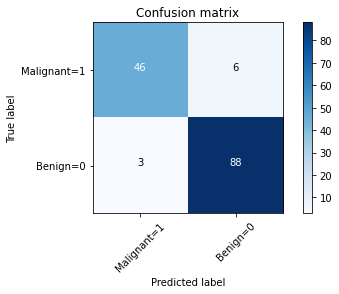

In [126]:
# Computing confusion matrix

cnf_matrix = confusion_matrix(y_test, y_hat, labels=[1,0])
np.set_printoptions(precision=2)

# Plot the confusion matrix for decision tree
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Malignant=1', 'Benign=0'],normalize= False,  title='Confusion matrix')
plt.show()

In [127]:
# Get accuracy score for decision tree

print(classification_report(y_test, y_hat))

              precision    recall  f1-score   support

           0       0.94      0.97      0.95        91
           1       0.94      0.88      0.91        52

    accuracy                           0.94       143
   macro avg       0.94      0.93      0.93       143
weighted avg       0.94      0.94      0.94       143



We can see the accuracy for decision tree is lower and we have more false positives and false negatives than logistic regression ([here](https://github.com/hanada-stephan/Kaggle/blob/main/Breast%20cancer%20prediction/breast_cancer_prediction.ipynb)). This is dangerous because false positives lead us to take unnacessary actions to "cure the tumor" which do not exist and all the treatment has a cost. In other hand, false negatives will delay the start the treatments and this could be fatal since the tumor will continue to grow.

Let's find a way to improve our model's scores. The first step is to look at the depth of our model.

In [128]:
  print("Maximum depth of the model: ", DecisionTree.get_depth())

Maximum depth of the model:  6


Our decision tree has maximum depth level of 6, which is good to avoid overfitting. So I do not need to set maximum max_depth parameter value in order to improve model's performance. But let's limit the minimum number of samples in each leaf to 10.  

In [129]:
# Training the model

DecisionTree = DecisionTreeClassifier(random_state=10, min_samples_leaf=10)
DecisionTree.fit(X_train, y_train)

DecisionTreeClassifier(min_samples_leaf=10, random_state=10)

In [130]:
# Checking the training score for decision tree with limited samples per leaf

DecisionTree.score(X_train, y_train)

0.9577464788732394

In [131]:
# Checking the validation score for decision tree with limited samples per leaf

DecisionTree.score(X_test, y_test)

0.9440559440559441

Confusion matrix, without normalization
[[45  7]
 [ 1 90]]


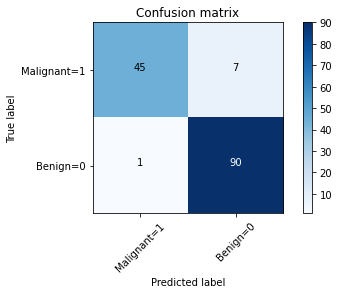

In [132]:
# Predicting the probability of tumor is benign or malignant and building the confusion matrix

y_prob = DecisionTree.predict(X_test)

# Computing confusion matrix

cnf_matrix = confusion_matrix(y_test, y_prob, labels=[1,0])
np.set_printoptions(precision=2)

# Plot the confusion matrix for decision tree
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Malignant=1', 'Benign=0'],normalize= False,  title='Confusion matrix')
plt.show()

We still have false positives and false negatives in our confusion matrix which leads us to a worst model's performance when we limit the minimum number of samples per leaf. So far, the best model is the first one. 

# Emsemble learning: bagging

Since our decision tree model have worst scores than logistic regression and this could lead to wrong decisions. In order to enhance the chances of right breast cancer predictions we will use an ensemble learning tecnique called bagging i.e. *bootstraping aggregating*. *Bootstrapping* is a population resampling, in many subsamples, in a way that the main characteristics are maintained and they have to be independent of each other. Then we will create a model using each of these subsamples and then aggregate all the outcomes in one metric (sum, mean, etc). The most well-known bagging algorithm is Random Forest, which I will use from now on.

Randon forest creates several estimators, i.e. simple decision trees, using subsamples of the original data and some, not all, features to train the algorithm. Those records not used in a determined decision tree (out of bag data) will be labeled as True or False in this case. After all the algorithm are finished, the final outcome of all records will be set as the most "voted" outcome of all algorithms. 

In [133]:
# Instantiate and running random forest algorithm

random_forest = RandomForestClassifier(n_estimators = 100, random_state = 0)
random_forest.fit(X_train, y_train)
y_hat_rf = random_forest.predict(X_test)

In [134]:
# Checking the training score for random forest
random_forest.score(X_train, y_train)

1.0

In [135]:
# Checking the validation score for random forest

random_forest.score(X_test, y_test)

0.9790209790209791

We can see that both algorithms have similar scores for train and test sets. Let's see the confusion matrix to see which one performed best.

Confusion matrix, without normalization
[[49  3]
 [ 0 91]]


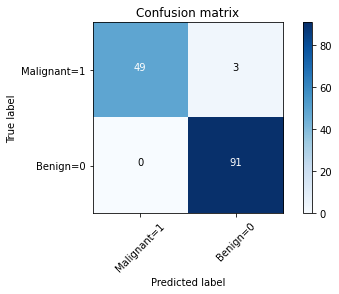

In [136]:
# Plot confusion matrix for random forest

# Computing confusion matrix

cnf_matrix = confusion_matrix(y_test, y_hat_rf, labels=[1,0])
np.set_printoptions(precision=2)

# Plot the confusion matrix for decision tree
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Malignant=1', 'Benign=0'],normalize= False,  title='Confusion matrix')
plt.show()

We can see that there are no false positives and 3 false negatives, which is good. On the other hand, we still have 3 false negatives which could lead the doctors to postpone the treatment start. This can be fatal. We need to work on eliminate this 3 remaining cases. Let's use boosting tecniques in order to improve our model performance even more. 

# Ensemble learning: boosting

Now, I am going to use another ensemble learning tecnique called boosting. Unlike bagging, boosting tecnique creates dependent and sequential models. One of the most famous boosting algorithms is AdaBoost, i.e. adaptative boosting. Every following model will correct the mistakes in the previous model and so on. That's why we call it adaptative.  

But how does this AdaBoost work?

1. The algorithm will label every record in our dataset with equal weights (1/total number of records). Then, it builds simple decision trees based on only one dataset feature at a time with all rows.  

2. The algorithm choose randomly a tree and it calculates its influence over the other decision trees using the following formula: $\alpha = \frac{1}{2}log(\frac{1 - error}{error})$, where error is calculated by: $error = \frac{\text{records wrongly labeled}}{\text{all the records}}$. $\alpha$ can assume positives and negatives values but the larger the number is, the more influence in the following tree our decision tree will have.

3. Change the original weight of every record, using the following formula: $w_{i} = w_{i-1}*e^{\pm \alpha}$, where $w_{i}$ is the new record weigth and $w_{i-1}$ is the previous record weigth. When the record is wrongly labeled, it uses the + because we need to improve its weight in order to correct the label in the next iteration. Otherwise, i.e. when the record is correctly labeled, then we use the - because this records is already done and the algorithm need to focus on the wrong ones. 

4. Set the interval by adding the weight of a record and the following record. Then, the algorithm will pick n random number between 0 and the sum of the last row's weight, creating a new dataset with its original number of rows. This dataset may contain duplicated records. 

5. Set equal weights again in the new dataset and then start the process all over again. 

Now let's build our AdaBoost model and evaluate it.

In [137]:
ada_boost = AdaBoostClassifier(random_state = 0)

In [138]:
ada_boost.fit(X_train, y_train)
y_hat_ada = ada_boost.predict(X_test)

In [139]:
# Checking the training score for AdaBoost

ada_boost.score(X_train, y_train)

1.0

In [140]:
# Checking the validation score for AdaBoost

ada_boost.score(X_test, y_test)

0.986013986013986

We can see thar our validation score is better than the randon forest's. Let's see if this score reflects in the confusion matrix. 

Confusion matrix, without normalization
[[50  2]
 [ 0 91]]


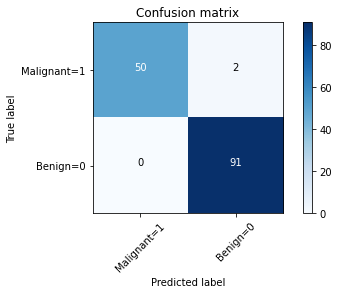

In [141]:
# Plot confusion matrix for random forest

# Computing confusion matrix

cnf_matrix = confusion_matrix(y_test, y_hat_ada, labels=[1,0])
np.set_printoptions(precision=2)

# Plot the confusion matrix for decision tree
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Malignant=1', 'Benign=0'],normalize= False,  title='Confusion matrix')
plt.show()

Now we have a similar performance than the logistic regression model. The model left us with only false negative which will reduce the number of people impacted by the late cancer treatment. Yet, there are no false positives, in other words, there will be no people taking drugs unnecessarily.

Obs: I am using random state = 0 in order to have similar results every time I run this notebook but the confusion matrix and the model's score may vary slightly.

# Recomendations

This model could not be the only method to detect breast or any other type of cancer. It should be used as a complementary tecnique among others to achieve 100% precision and avoid false positives (starting unnecessary cancer treatment) and false negatives (delaying the treatment's start and making it possibly fatal for the patiet).